In [17]:
import pandas as pd, numpy as np, os, sys, seaborn as sns   
import matplotlib.pyplot as plt 
import plotly.graph_objects as go, statsmodels 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


DATA = 'Superstore.xls'  


def describe_df( df ):
    display(df.head(5))
    display(df.dtypes)

def harmnonize_column_names( df ):
    df.columns = [col.lower().replace(' ','_') for col in df.columns ]




In [4]:
df_raw = pd.read_excel( DATA )


In [5]:

df_raw.columns 
categories = df_raw[ ['Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Segment', 'Category', 'Sub-Category','Sales']] 

describe_df( categories )

,Order ID,Order Date,Ship Date,Customer ID,Segment,Category,Sub-Category,Sales
0,CA-2013-152156,2013-11-09,2013-11-12,CG-12520,Consumer,Furniture,Bookcases,261.9600
1,CA-2013-152156,2013-11-09,2013-11-12,CG-12520,Consumer,Furniture,Chairs,731.9400
2,CA-2013-138688,2013-06-13,2013-06-17,DV-13045,Corporate,Office Supplies,Labels,14.6200
3,US-2012-108966,2012-10-11,2012-10-18,SO-20335,Consumer,Furniture,Tables,957.5775
4,US-2012-108966,2012-10-11,2012-10-18,SO-20335,Consumer,Office Supplies,Storage,22.3680


Order ID                object
Order Date      datetime64[ns]
Ship Date       datetime64[ns]
Customer ID             object
Segment                 object
Category                object
Sub-Category            object
Sales                  float64
dtype: object

In [6]:
base =  categories.groupby( ['Order Date', 'Category'], as_index = False  )[['Sales']].sum()
harmnonize_column_names( base )
display( base.head(5) )

,order_date,category,sales
0,2011-01-04,Office Supplies,16.448
1,2011-01-05,Office Supplies,288.060
2,2011-01-06,Office Supplies,19.536
3,2011-01-07,Furniture,2573.820
4,2011-01-07,Office Supplies,685.340


(0.0, 1.0)

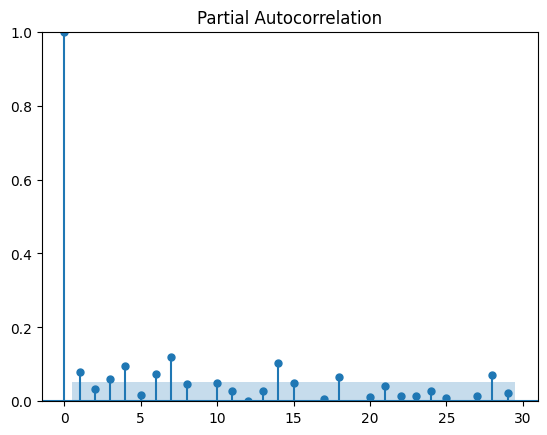

In [24]:
cat_sales = base.pivot_table( index = 'order_date', columns = 'category' ,values = 'sales', fill_value = 0.0  )
new_index = pd.date_range( cat_sales.index.min(), cat_sales.index.max(), freq='D') 
cat_sales = cat_sales.reindex( new_index, fill_value = 0.0 ) 
cat_sales.index.name = 'Date'  
cat_sales 



acf_plot =  plot_pacf( cat_sales['Furniture'], lags = 29 )
plt.ylim( (0.0, 1.0 ))


In [29]:
[x for x in dir(acf_plot) if not x.startswith('_') ] 

acf_plot.clf 

<bound method FigureBase.clf of <Figure size 640x480 with 1 Axes>>

category,Furniture,Office Supplies,Technology
Date,,,
2011-03-31,22656.1390,14528.683,37262.974
2011-06-30,28063.7496,31243.735,27231.275
2011-09-30,41957.8783,53923.968,47751.366
2011-12-31,64515.0862,52080.026,63032.618
2012-03-31,27374.0986,23059.394,18418.246


/tmp/ipykernel_3592/3809860616.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot( weekly_cat_sales['2011-01-01':'2011-12-31'], markers='*', markersize=12 )


<Axes: xlabel='Date'>

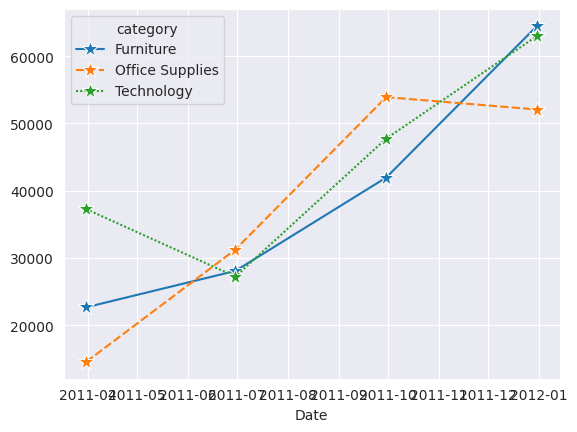

In [212]:
weekly_cat_sales = cat_sales.resample( rule = 'QE' ).sum()
display(weekly_cat_sales.head(5))

sns.set_style('darkgrid') 
sns.lineplot( weekly_cat_sales['2011-01-01':'2011-12-31'], markers='*', markersize=12 )

/tmp/ipykernel_3592/2437469165.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sns.lineplot( weekly_cat_sales.asfreq('Y') )


<Axes: xlabel='Date'>

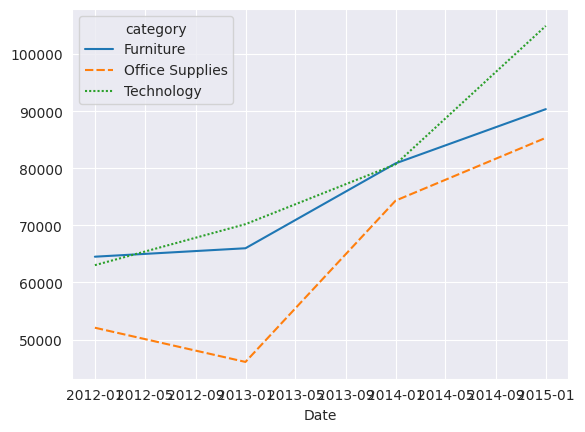

In [216]:
weekly_cat_sales = weekly_cat_sales.resample( rule = 'D' ).interpolate( method = 'spline', order=2 ) 
sns.lineplot( weekly_cat_sales.asfreq('Y') )



category,Furniture,Office Supplies,Technology
2011-01-04,0.000,16.448,0.00
2011-01-05,0.000,288.060,0.00
2011-01-06,0.000,19.536,0.00
2011-01-07,2573.820,685.340,1147.94
2011-01-08,76.728,10.430,0.00


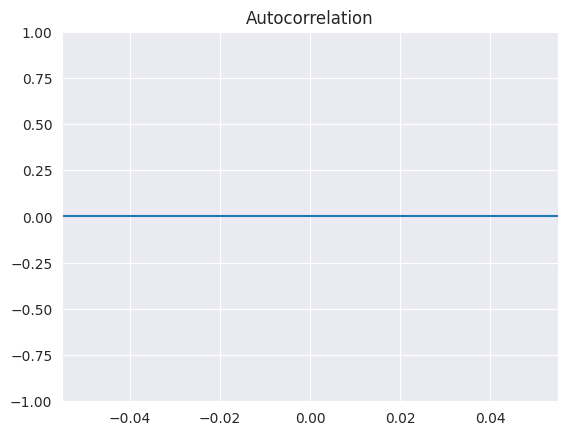

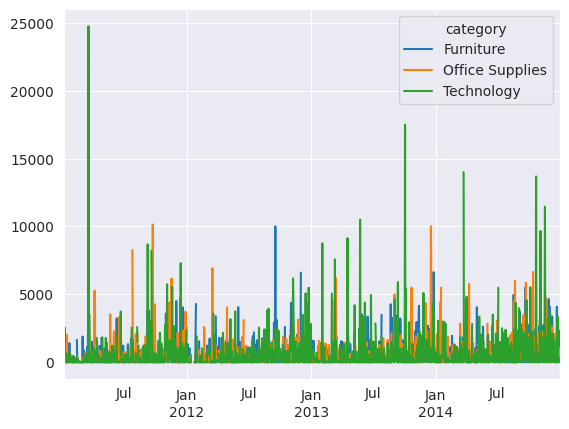

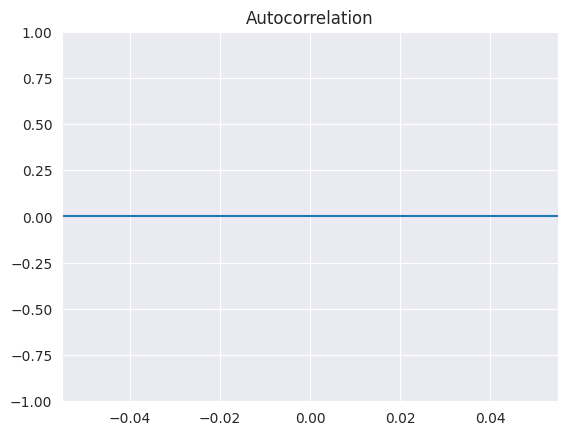

In [278]:
categories_df = base.groupby( ['order_date','category'], as_index=False )[['sales']].sum().\
    pivot_table( values = 'sales', columns = 'category', index='order_date', fill_value=0.0)

dates = pd.date_range( categories_df.index.min(), categories_df.index.max(), freq='D')
#
categories_df = categories_df.reindex( dates, fill_value=np.nan)
display(categories_df.head(5))

categories_df.plot( )

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf( categories_df['Furniture'], lags =10 )

In [279]:
categories_df



category,Furniture,Office Supplies,Technology
2011-01-04,0.0000,16.448,0.000
2011-01-05,0.0000,288.060,0.000
2011-01-06,0.0000,19.536,0.000
2011-01-07,2573.8200,685.340,1147.940
2011-01-08,76.7280,10.430,0.000
...,...,...,...
2014-12-27,0.0000,814.594,0.000
2014-12-28,0.0000,13.248,164.388
2014-12-29,551.2568,1091.244,14.850
2014-12-30,2330.7180,282.440,302.376


In [112]:
np.diff( dates, 1 ) .max()

numpy.timedelta64(4,'D')

In [106]:
mathods = [x for x in dir( dates[1] ) if not x.startswith('_') ]

for i in mathods: 
    print( i )

T
all
any
argmax
argmin
argsort
astype
base
byteswap
choose
clip
compress
conj
conjugate
copy
cumprod
cumsum
data
diagonal
dtype
dump
dumps
fill
flags
flat
flatten
getfield
imag
item
itemset
itemsize
max
mean
min
nbytes
ndim
newbyteorder
nonzero
prod
ptp
put
ravel
real
repeat
reshape
resize
round
searchsorted
setfield
setflags
shape
size
sort
squeeze
std
strides
sum
swapaxes
take
tobytes
tofile
tolist
tostring
trace
transpose
var
view


In [108]:
for x in mathods: 

    print( x )


T
all
any
argmax
argmin
argsort
astype
base
byteswap
choose
clip
compress
conj
conjugate
copy
cumprod
cumsum
data
diagonal
dtype
dump
dumps
fill
flags
flat
flatten
getfield
imag
item
itemset
itemsize
max
mean
min
nbytes
ndim
newbyteorder
nonzero
prod
ptp
put
ravel
real
repeat
reshape
resize
round
searchsorted
setfield
setflags
shape
size
sort
squeeze
std
strides
sum
swapaxes
take
tobytes
tofile
tolist
tostring
trace
transpose
var
view
